🔄 Inicializando análisis XAU/USD ultra avanzado...
📊 Temporalidades: ['1M', '15M', '1H']
         ANÁLISIS INSTITUCIONAL XAU/USD - ESTRATEGIA AVANZADA         
Este análisis combina:
- Detección de tendencias basada en volumen
- Identificación precisa de Fair Value Gaps (FVG)
- Anomalías de precio/volumen en tiempo real
- Inyecciones de capital institucional
- Rendimiento logarítmico vs. media móvil

🔍 Símbolo: GC=F
⏱️  Temporalidades: 1M, 15M, 1H



Presiona Enter para generar el análisis completo... 



📊 Generando dashboard profesional ultra avanzado...

⏳ Descargando datos 1m...
✅ Datos 1m obtenidos: 400 velas

⏳ Descargando datos 15m...
✅ Datos 15m obtenidos: 150 velas

⏳ Descargando datos 1h...
✅ Datos 1h obtenidos: 72 velas


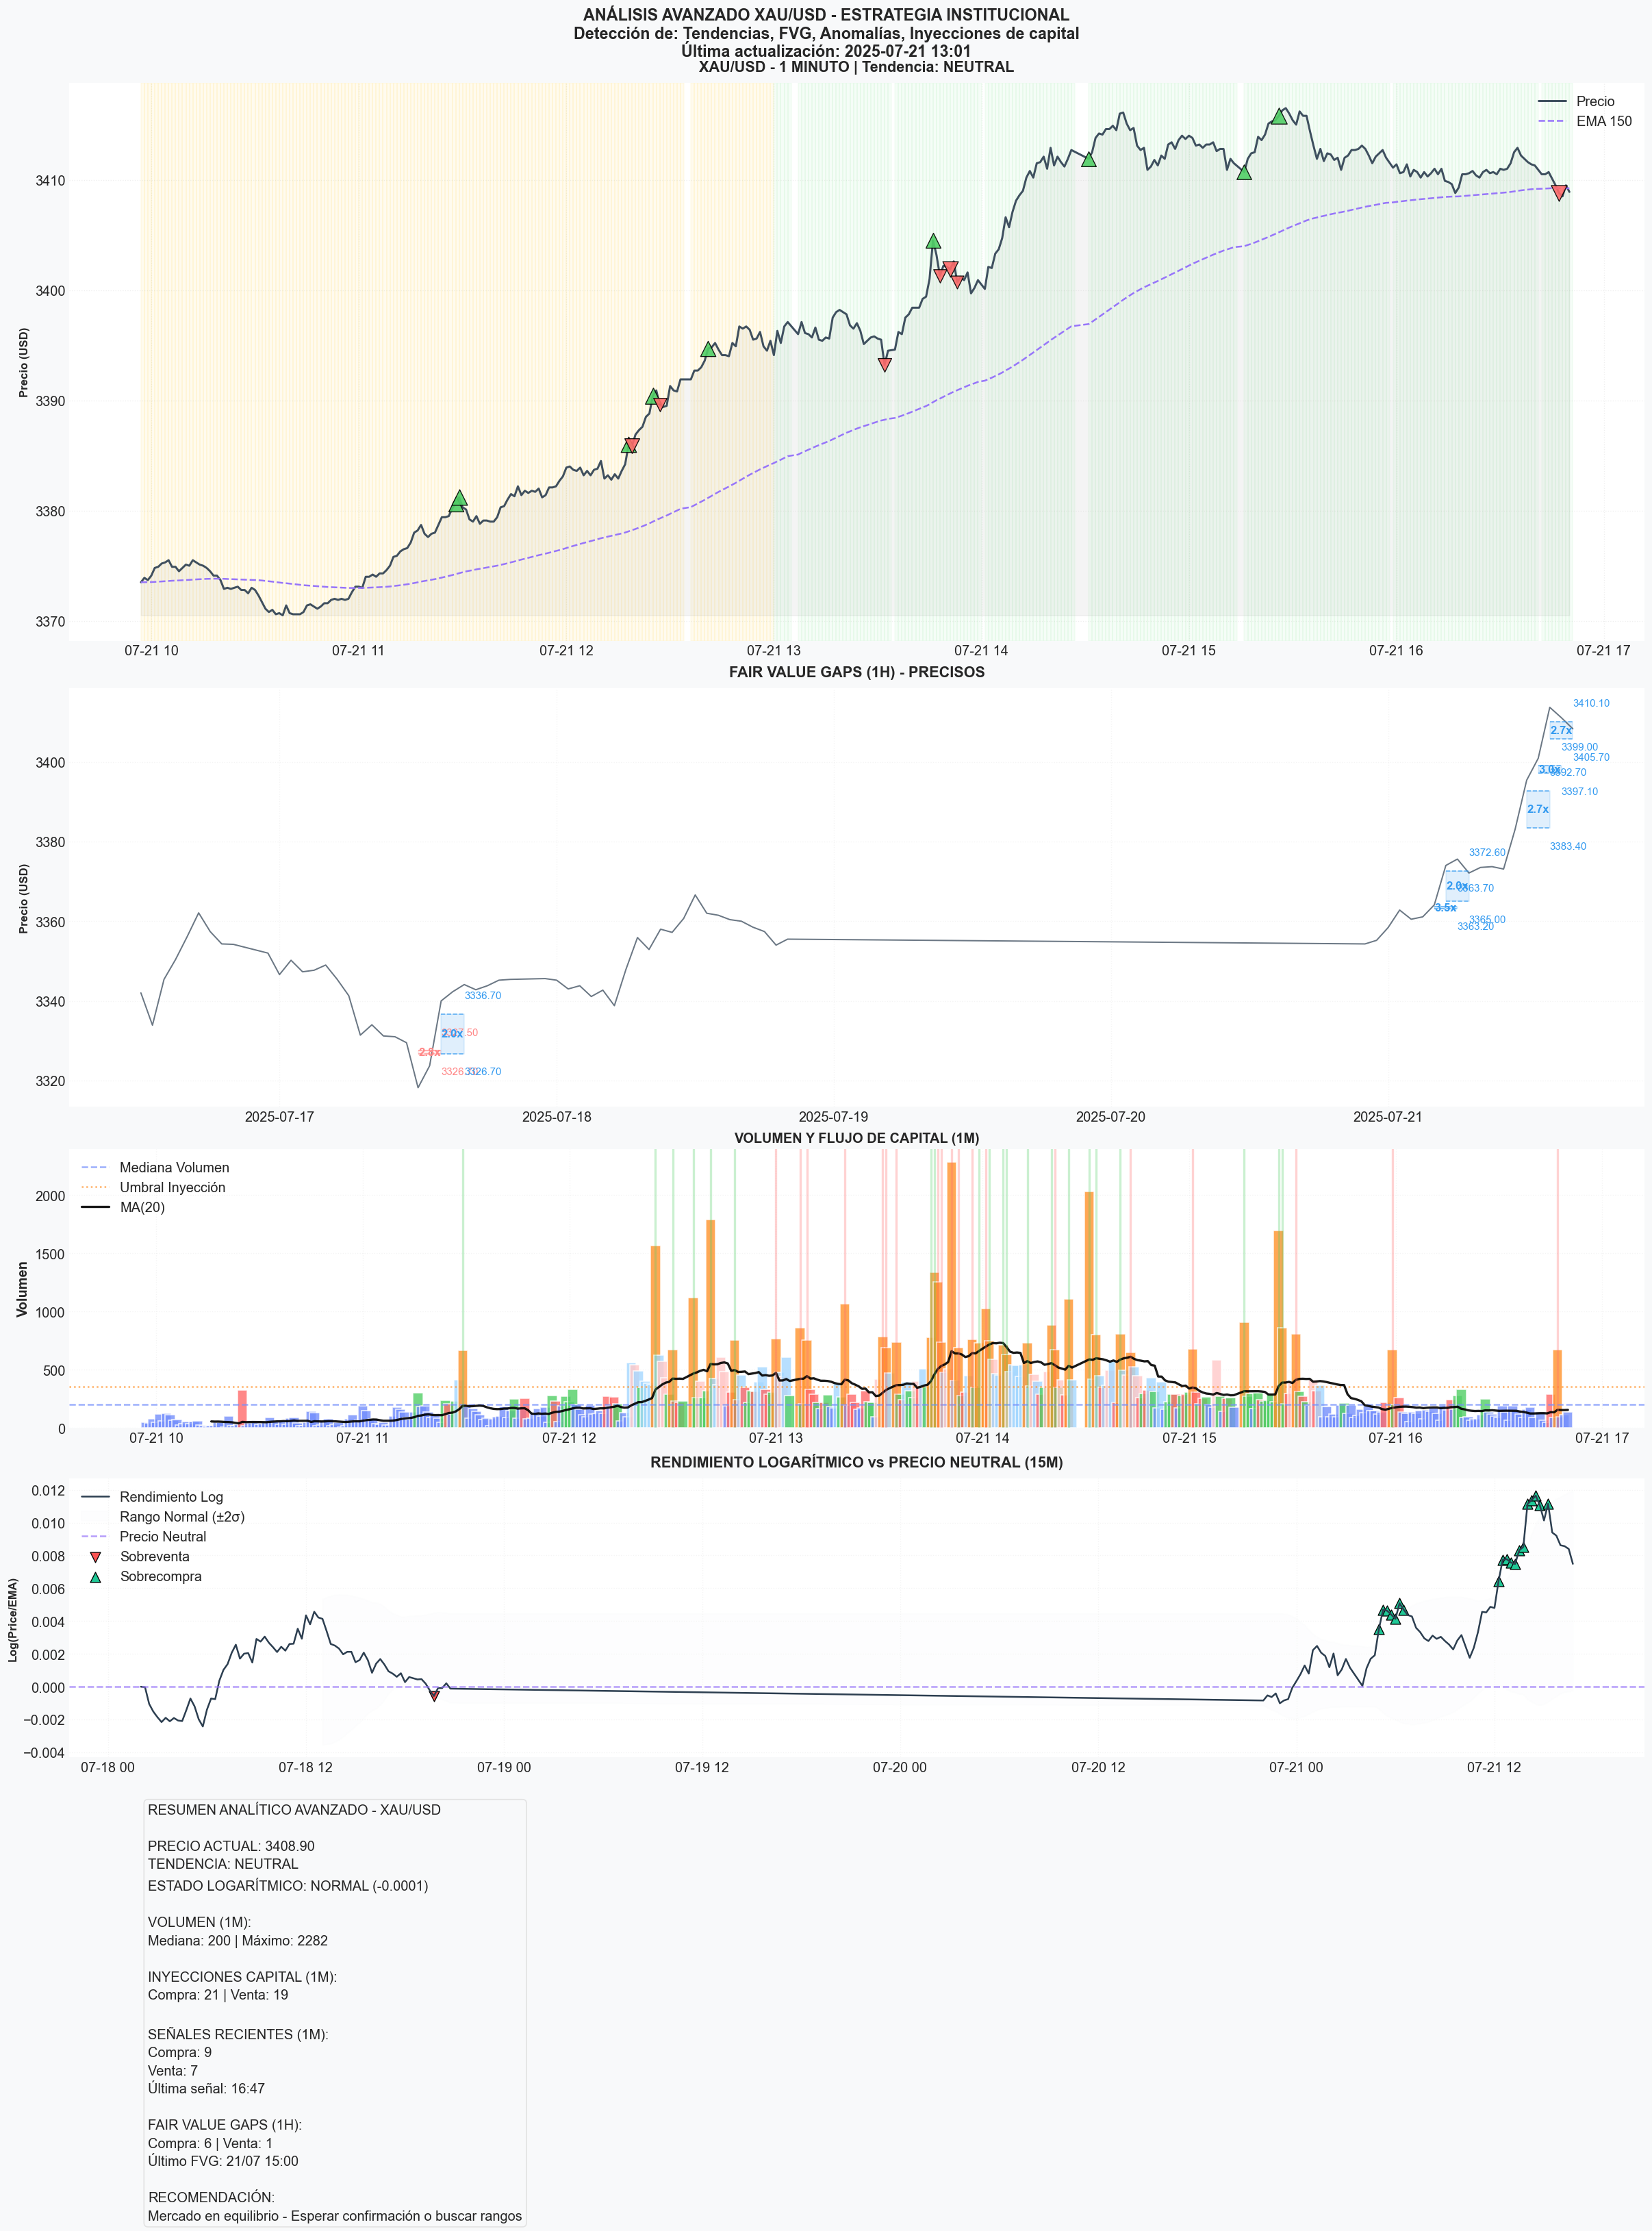


✅ Análisis ultra avanzado completado


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta, time
import math

# Configuración visual profesional
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.figsize': (20, 30),
    'figure.dpi': 120,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# Paleta de colores optimizada
COLORS = {
    'venta': "#FF6B6B",     # Rojo coral
    'compra': "#51CF66",    # Verde fresco
    'vol_alto': "#FF922B",  # Naranja vibrante
    'precio': "#2C3E50",    # Gris oscuro
    'tendencia_alcista': "#1971C2",
    'tendencia_bajista': "#E03131",
    'fondo': "#F8F9FA",
    'london_session': "#FFD43B",  # Amarillo brillante
    'ny_session': "#4DABF7",      # Azul claro
    'overlap_session': "#8CE99A", # Verde menta
    'neutral_price': "#9775FA",   # Púrpura suave
    'log_positive': "#20C997",    # Verde turquesa
    'log_negative': "#FA5252",    # Rojo claro
    'fvg_buy': "#339AF0",         # Azul más vibrante para FVG compra
    'fvg_sell': "#FF8787",        # Rojo más vibrante para FVG venta
    'volumen': "#748FFC",         # Azul para volumen
    'inyeccion_compra': "#A5D8FF", # Azul claro para inyección compra
    'inyeccion_venta': "#FFC9C9"   # Rojo claro para inyección venta
}

class AdvancedXAUUSDAnalysis:
    def __init__(self):
        self.symbol = "GC=F"
        self.timeframes = {
            '1M': "1m",
            '15M': "15m",
            '1H': "1h"
        }
        
        # Parámetros optimizados
        self.anomaly_threshold = 2.8
        self.volume_multiplier = 2.0
        self.trend_volume_threshold = 1.5
        self.liquidity_volume_threshold = 2.0
        self.fvg_strength_threshold = 1.8  # Umbral para FVG significativos
        self.capital_injection_threshold = 0.5  # 0.5% de movimiento
        
        # Horarios de liquidez (GMT)
        self.london_open = time(8, 0)
        self.london_close = time(17, 0)
        self.ny_open = time(13, 0)  # 8AM EST = 1PM GMT
        self.ny_close = time(18, 0)  # 1PM EST = 6PM GMT
        
        print("🔄 Inicializando análisis XAU/USD ultra avanzado...")
        print(f"📊 Temporalidades: {list(self.timeframes.keys())}")

    def detect_trend_by_volume(self, df):
        """Determina la tendencia predominante basada en volumen"""
        high_volume = df[(df['volume'] > self.trend_volume_threshold * df['volume'].median()) & 
                        (df['close'] != df['open'])]
        
        if len(high_volume) < 5:
            return 'neutral'
        
        buy_ratio = len(high_volume[high_volume['close'] > high_volume['open']]) / len(high_volume)
        
        if buy_ratio > 0.65:
            return 'alcista'
        elif buy_ratio < 0.35:
            return 'bajista'
        else:
            return 'neutral'

    def is_liquid_session(self, dt):
        """Determina si el horario es de alta liquidez"""
        dt_time = dt.time()
        london_session = self.london_open <= dt_time <= self.london_close
        ny_session = self.ny_open <= dt_time <= self.ny_close
        return london_session or ny_session

    def get_data(self, timeframe, count):
        """Obtiene y procesa datos con manejo de errores"""
        try:
            period_map = {'1m': '7d', '15m': '60d', '1h': '60d'}
            
            print(f"\n⏳ Descargando datos {timeframe}...")
            data = yf.download(
                tickers=self.symbol,
                period=period_map[timeframe],
                interval=timeframe,
                progress=False,
                auto_adjust=True
            )
            
            if data.empty:
                raise ValueError("No se recibieron datos del mercado")
                
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
            data.columns = ['open', 'high', 'low', 'close', 'volume']
            data.index.name = 'timestamp'
            
            data = data[data['volume'] > 0].iloc[-count:]
            data['returns'] = data['close'].pct_change()
            data['liquid_session'] = data.index.map(self.is_liquid_session)
            
            print(f"✅ Datos {timeframe} obtenidos: {len(data)} velas")
            return data
            
        except Exception as e:
            print(f"⚠️ Error en datos reales: {str(e)}")
            return self.generate_simulated_data(timeframe, count)

    def generate_simulated_data(self, timeframe, count):
        """Genera datos simulados para pruebas"""
        np.random.seed(42)
        freq_map = {'1m': '1min', '15m': '15min', '1h': '1h'}
        dates = pd.date_range(end=pd.Timestamp.now(), periods=count, freq=freq_map[timeframe])
        
        base_price = 1800 + np.cumsum(np.random.randn(count) * 0.5)
        
        data = pd.DataFrame({
            'open': base_price,
            'high': base_price + np.abs(np.random.randn(count)) * 1.2,
            'low': base_price - np.abs(np.random.randn(count)) * 1.2,
            'close': base_price + np.random.randn(count) * 0.8,
            'volume': np.abs(np.random.normal(100, 30, count)).astype(int),
            'returns': np.zeros(count),
            'liquid_session': False
        }, index=dates)
        
        for i in range(len(data)):
            data.iloc[i, data.columns.get_loc('liquid_session')] = self.is_liquid_session(data.index[i])
            if data.iloc[i]['liquid_session']:
                data.iloc[i, data.columns.get_loc('volume')] = int(data.iloc[i]['volume'] * 1.8)
        
        data['returns'] = data['close'].pct_change()
        return data

    def detect_fvg(self, df):
        """Detección precisa de Fair Value Gaps con niveles exactos de precio"""
        df['fvg'] = False
        df['fvg_type'] = None
        df['fvg_strength'] = 0.0
        df['fvg_low'] = np.nan
        df['fvg_high'] = np.nan
        
        for i in range(2, len(df)):
            # FVG Alcista (Hueco hacia arriba)
            if df.iloc[i-2]['high'] < df.iloc[i]['low']:
                fvg_low = df.iloc[i-2]['high']
                fvg_high = df.iloc[i]['low']
                fvg_volume = df.iloc[i-1]['volume']
                strength = fvg_volume / df['volume'].rolling(20).mean().iloc[i-1]
                
                if strength > self.fvg_strength_threshold:
                    df.at[df.index[i], 'fvg'] = True
                    df.at[df.index[i], 'fvg_type'] = 'compra'
                    df.at[df.index[i], 'fvg_strength'] = strength
                    df.at[df.index[i], 'fvg_low'] = fvg_low
                    df.at[df.index[i], 'fvg_high'] = fvg_high
            
            # FVG Bajista (Hueco hacia abajo)
            elif df.iloc[i-2]['low'] > df.iloc[i]['high']:
                fvg_high = df.iloc[i-2]['low']
                fvg_low = df.iloc[i]['high']
                fvg_volume = df.iloc[i-1]['volume']
                strength = fvg_volume / df['volume'].rolling(20).mean().iloc[i-1]
                
                if strength > self.fvg_strength_threshold:
                    df.at[df.index[i], 'fvg'] = True
                    df.at[df.index[i], 'fvg_type'] = 'venta'
                    df.at[df.index[i], 'fvg_strength'] = strength
                    df.at[df.index[i], 'fvg_low'] = fvg_low
                    df.at[df.index[i], 'fvg_high'] = fvg_high
        
        return df

    def detect_anomalies(self, df):
        """Detección mejorada de anomalías con filtro de liquidez"""
        rolling_window = max(20, int(len(df)*0.1))
        
        # 1. Anomalías de volumen
        df['vol_mean'] = df['volume'].rolling(rolling_window, min_periods=5).mean()
        df['vol_std'] = df['volume'].rolling(rolling_window, min_periods=5).std()
        df['vol_z'] = (df['volume'] - df['vol_mean']) / (df['vol_std'] + 1e-6)
        
        # 2. Anomalías de precio
        returns = df['returns'].clip(-0.01, 0.01)
        median = returns.rolling(rolling_window, min_periods=5).median()
        mad = 1.4826 * np.abs(returns - median).rolling(rolling_window, min_periods=5).median()
        df['ret_z'] = (returns - median) / (mad + 1e-6)
        
        # 3. Filtro de liquidez
        df['liquidity_ok'] = df['volume'] > df['volume'].quantile(0.7)
        
        # Clasificación compuesta
        df['anomaly'] = (
            (np.abs(df['vol_z']) > self.anomaly_threshold) |
            (np.abs(df['ret_z']) > self.anomaly_threshold)
        ) & df['liquidity_ok']
        
        # Tipo de anomalía
        conditions = [
            (df['close'] > df['open']) & df['anomaly'],  # Compra
            (df['close'] < df['open']) & df['anomaly']   # Venta
        ]
        choices = ['compra', 'venta']
        df['anomaly_type'] = np.select(conditions, choices, default=None)
        
        return df

    def calculate_capital_injections(self, df):
        """Identifica inyecciones fuertes de capital"""
        # Niveles dinámicos de volumen
        vol_median = df['volume'].median()
        vol_q75 = df['volume'].quantile(0.75)
        vol_q90 = df['volume'].quantile(0.90)
        
        # Movimiento de precio significativo
        df['price_move'] = (df['high'] - df['low']) / df['close'] * 100
        
        # Condiciones para inyecciones
        df['inyeccion_fuerte'] = (
            (df['volume'] > vol_q90) | 
            ((df['volume'] > vol_q75) & (df['price_move'] > self.capital_injection_threshold))
        )
        
        # Dirección de la inyección
        df['tipo_inyeccion'] = np.where(
            df['inyeccion_fuerte'] & (df['close'] > df['open']),
            'compra',
            np.where(
                df['inyeccion_fuerte'] & (df['close'] < df['open']),
                'venta',
                None
            )
        )
        
        return df

    def calculate_log_performance(self, df, ema_window=200):
        """Calcula el rendimiento logarítmico con EMAs adaptativas"""
        window_size = min(ema_window, int(len(df)*0.5))
        df['ema'] = df['close'].ewm(span=window_size, adjust=False).mean()
        df['log_return'] = np.log(df['close'] / df['ema'])
        
        # Bandas de volatilidad adaptativas
        rolling_window = min(100, int(len(df)*0.3))
        mean_log = df['log_return'].rolling(rolling_window).mean()
        std_log = df['log_return'].rolling(rolling_window).std()
        
        df['upper_band'] = mean_log + 2 * std_log
        df['lower_band'] = mean_log - 2 * std_log
        df['anomaly_log'] = (df['log_return'] > df['upper_band']) | (df['log_return'] < df['lower_band'])
        
        return df

    def _plot_price(self, ax, data, title, trend_color):
        """Gráfico de precio con sesiones y anomalías"""
        # Áreas de sesiones líquidas
        for i in range(len(data)):
            dt = data.index[i]
            if self.london_open <= dt.time() <= self.london_close:
                if self.ny_open <= dt.time() <= self.ny_close:
                    ax.axvspan(dt, dt + timedelta(minutes=1), color=COLORS['overlap_session'], alpha=0.08)
                else:
                    ax.axvspan(dt, dt + timedelta(minutes=1), color=COLORS['london_session'], alpha=0.08)
            elif self.ny_open <= dt.time() <= self.ny_close:
                ax.axvspan(dt, dt + timedelta(minutes=1), color=COLORS['ny_session'], alpha=0.08)
        
        # Línea de precio
        ax.plot(data.index, data['close'], color=COLORS['precio'], linewidth=1.8, alpha=0.9, label='Precio')
        ax.plot(data.index, data['ema'], color=COLORS['neutral_price'], linestyle='--', linewidth=1.5, label='EMA 150')
        
        # Relleno de tendencia
        ax.fill_between(data.index, data['close'], data['close'].min(), color=trend_color, alpha=0.08)
        
        # Anomalías
        if 'anomaly_type' in data.columns:
            anomalies = data[data['anomaly_type'].notna()]
            for idx, row in anomalies.iterrows():
                color = COLORS['compra'] if row['anomaly_type'] == "compra" else COLORS['venta']
                marker = '^' if row['anomaly_type'] == "compra" else 'v'
                size = 120 + (abs(row['vol_z']) * 15)
                
                ax.scatter(idx, row['close'], color=color, s=size, alpha=0.9,
                          marker=marker, edgecolors='black', linewidth=0.8, zorder=5)
        
        ax.set_title(title, pad=10, fontsize=13, fontweight='bold')
        ax.set_ylabel('Precio (USD)', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.3)
        ax.legend()

    def _plot_enhanced_fvg(self, ax, data, title):
        """Gráfico de FVG con niveles de precio precisos"""
        if 'fvg_type' not in data.columns:
            ax.text(0.5, 0.5, "No se detectaron FVG significativos", 
                   ha='center', va='center', fontsize=12)
            ax.set_title(title)
            return
        
        # Línea de precio
        ax.plot(data.index, data['close'], color=COLORS['precio'], linewidth=1.2, alpha=0.7)
        
        # Dibujar FVG con niveles exactos
        fvg_data = data[data['fvg']]
        for idx, row in fvg_data.iterrows():
            if row['fvg_type'] == 'compra':
                color = COLORS['fvg_buy']
                label = 'FVG Compra'
            else:
                color = COLORS['fvg_sell']
                label = 'FVG Venta'
            
            # Líneas horizontales para los niveles exactos
            ax.hlines(y=row['fvg_low'], xmin=idx-timedelta(hours=1), xmax=idx+timedelta(hours=1),
                     colors=color, linestyles='--', alpha=0.7, linewidth=1)
            ax.hlines(y=row['fvg_high'], xmin=idx-timedelta(hours=1), xmax=idx+timedelta(hours=1),
                     colors=color, linestyles='--', alpha=0.7, linewidth=1)
            
            # Relleno entre los niveles
            ax.fill_between(
                x=[mdates.date2num(idx-timedelta(hours=1)), mdates.date2num(idx+timedelta(hours=1))],
                y1=row['fvg_low'],
                y2=row['fvg_high'],
                color=color, alpha=0.15
            )
            
            # Etiqueta con precio exacto
            ax.text(idx+timedelta(hours=1), row['fvg_low']*0.999, f"{row['fvg_low']:.2f}", 
                   ha='left', va='top', fontsize=9, color=color)
            ax.text(idx+timedelta(hours=1), row['fvg_high']*1.001, f"{row['fvg_high']:.2f}", 
                   ha='left', va='bottom', fontsize=9, color=color)
            
            # Fuerza del FVG
            ax.text(idx, (row['fvg_low'] + row['fvg_high'])/2, 
                   f"{row['fvg_strength']:.1f}x", ha='center', va='center', 
                   fontsize=10, color=color, weight='bold')
        
        ax.set_title(title, pad=10, fontsize=13, fontweight='bold')
        ax.set_ylabel('Precio (USD)', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.2)

    def _plot_volume_capital_flow(self, ax, data, title):
        """Gráfico avanzado de volumen y flujo de capital (1M)"""
        # Calcular niveles dinámicos de volumen
        vol_median = data['volume'].median()
        vol_mean = data['volume'].mean()
        vol_q75 = data['volume'].quantile(0.75)
        vol_q90 = data['volume'].quantile(0.90)
        
        # Colores según nivel de volumen
        colors = []
        for idx, row in data.iterrows():
            if row['volume'] > vol_q90:
                colors.append(COLORS['vol_alto'])
            elif row['volume'] > vol_q75:
                colors.append(COLORS['inyeccion_compra'] if row['close'] > row['open'] else COLORS['inyeccion_venta'])
            elif row['volume'] > vol_median:
                colors.append(COLORS['compra'] if row['close'] > row['open'] else COLORS['venta'])
            else:
                colors.append(COLORS['volumen'])
        
        # Barras de volumen
        ax.bar(data.index, data['volume'], color=colors, width=0.002, alpha=0.8)
        
        # Líneas de referencia
        ax.axhline(vol_median, color=COLORS['volumen'], linestyle='--', linewidth=1.5, alpha=0.7, label='Mediana Volumen')
        ax.axhline(vol_q75, color=COLORS['vol_alto'], linestyle=':', linewidth=1.5, alpha=0.7, label='Umbral Inyección')
        
        # Media móvil de volumen
        if len(data) > 20:
            ax.plot(data.index, data['volume'].rolling(20).mean(),
                   color='black', linewidth=2, alpha=0.9, label='MA(20)')
        
        # Resaltar inyecciones de capital
        if 'tipo_inyeccion' in data.columns:
            inyecciones = data[data['tipo_inyeccion'].notna()]
            for idx, row in inyecciones.iterrows():
                color = COLORS['compra'] if row['tipo_inyeccion'] == 'compra' else COLORS['venta']
                ax.axvline(x=idx, color=color, linestyle='-', alpha=0.3, linewidth=2)
        
        ax.set_title(title, fontsize=12)
        ax.set_ylabel('Volumen')
        ax.grid(True, linestyle=':', alpha=0.2)
        ax.legend()

    def _plot_log_performance(self, ax, data, title):
        """Gráfico de rendimiento logarítmico vs precio neutral (15M)"""
        if 'log_return' not in data.columns:
            ax.text(0.5, 0.5, "Datos no disponibles", ha='center', va='center', fontsize=12)
            ax.set_title(title)
            return
        
        # Línea de rendimiento
        ax.plot(data.index, data['log_return'], color=COLORS['precio'], linewidth=1.5, label='Rendimiento Log')
        
        # Bandas y área
        ax.fill_between(data.index, data['upper_band'], data['lower_band'], 
                       color=COLORS['fondo'], alpha=0.2, label='Rango Normal (±2σ)')
        ax.axhline(0, color=COLORS['neutral_price'], linestyle='--', alpha=0.7, label='Precio Neutral')
        
        # Anomalías fuertes
        if 'anomaly_log' in data.columns:
            anomalies = data[data['anomaly_log']]
            for idx, row in anomalies.iterrows():
                color = COLORS['log_positive'] if row['log_return'] > 0 else COLORS['log_negative']
                marker = '^' if row['log_return'] > 0 else 'v'
                ax.scatter(idx, row['log_return'], color=color, s=80,
                          marker=marker, edgecolors='black', linewidth=0.8,
                          label='Sobrecompra' if row['log_return'] > 0 else 'Sobreventa')
        
        ax.set_title(title, pad=10, fontsize=13, fontweight='bold')
        ax.set_ylabel('Log(Price/EMA)', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.2)
        
        # Manejo de leyendas duplicadas
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())

    def _plot_advanced_summary(self, ax, data_1m, data_1h, trend):
        """Resumen estadístico avanzado (mejorado)"""
        ax.axis('off')
        
        # Datos para el resumen
        signals_1m = data_1m[data_1m['anomaly_type'].notna()]
        fvg_data = data_1h[data_1h['fvg']]
        
        current_price = data_1m['close'].iloc[-1]
        last_signal = signals_1m.index[-1].strftime('%H:%M') if not signals_1m.empty else "Ninguna"
        
        # Estadísticas de volumen
        vol_stats = data_1m['volume'].describe()
        
        # Estadísticas de rendimiento logarítmico
        if 'log_return' in data_1m.columns:
            log_return = data_1m['log_return'].iloc[-1]
            log_status = "ALTO" if log_return > data_1m['upper_band'].iloc[-1] else "BAJO" if log_return < data_1m['lower_band'].iloc[-1] else "NORMAL"
        else:
            log_return = "N/A"
            log_status = "N/A"
        
        # Estadísticas FVG
        fvg_buy = len(fvg_data[fvg_data['fvg_type'] == 'compra'])
        fvg_sell = len(fvg_data[fvg_data['fvg_type'] == 'venta'])
        last_fvg = fvg_data.index[-1].strftime('%d/%m %H:%M') if not fvg_data.empty else "Ninguno"
        
        # Inyecciones de capital
        if 'tipo_inyeccion' in data_1m.columns:
            inyecciones = data_1m[data_1m['tipo_inyeccion'].notna()]
            iny_compra = len(inyecciones[inyecciones['tipo_inyeccion'] == 'compra'])
            iny_venta = len(inyecciones[inyecciones['tipo_inyeccion'] == 'venta'])
        else:
            iny_compra = 0
            iny_venta = 0
        
        # Texto del resumen (mejorado)
        summary_text = [
            "RESUMEN ANALÍTICO AVANZADO - XAU/USD",
            f"\nPRECIO ACTUAL: {current_price:.2f}",
            f"TENDENCIA: {trend.upper()}",
            f"ESTADO LOGARÍTMICO: {log_status} ({log_return:.4f})",
            f"\nVOLUMEN (1M):",
            f"Mediana: {vol_stats['50%']:.0f} | Máximo: {vol_stats['max']:.0f}",
            f"\nINYECCIONES CAPITAL (1M):",
            f"Compra: {iny_compra} | Venta: {iny_venta}",
            f"\nSEÑALES RECIENTES (1M):",
            f"Compra: {len(signals_1m[signals_1m['anomaly_type'] == 'compra'])}",
            f"Venta: {len(signals_1m[signals_1m['anomaly_type'] == 'venta'])}",
            f"Última señal: {last_signal}",
            f"\nFAIR VALUE GAPS (1H):",
            f"Compra: {fvg_buy} | Venta: {fvg_sell}",
            f"Último FVG: {last_fvg}",
            f"\nRECOMENDACIÓN:",
            self._generate_advanced_recommendation(trend, signals_1m, fvg_data, log_status, iny_compra, iny_venta)
        ]
        
        ax.text(0.05, 0.95, "\n".join(summary_text), 
               ha='left', va='top', fontsize=12, linespacing=1.5,
               bbox=dict(facecolor=COLORS['fondo'], alpha=0.8, edgecolor='#dddddd', boxstyle='round'))

    def _generate_advanced_recommendation(self, trend, signals_1m, fvg_data, log_status, iny_compra, iny_venta):
        """Genera recomendación avanzada con múltiples factores"""
        buy_1m = len(signals_1m[signals_1m['anomaly_type'] == 'compra'])
        sell_1m = len(signals_1m[signals_1m['anomaly_type'] == 'venta'])
        
        fvg_buy = len(fvg_data[fvg_data['fvg_type'] == 'compra'])
        fvg_sell = len(fvg_data[fvg_data['fvg_type'] == 'venta'])
        
        conditions = [
            (log_status == "ALTO" and sell_1m > buy_1m and fvg_sell > fvg_buy and iny_venta > iny_compra),
            (log_status == "BAJO" and buy_1m > sell_1m and fvg_buy > fvg_sell and iny_compra > iny_venta),
            (trend == 'alcista' and (buy_1m + iny_compra) > (sell_1m + iny_venta) * 1.5 and fvg_buy > 0),
            (trend == 'bajista' and (sell_1m + iny_venta) > (buy_1m + iny_compra) * 1.5 and fvg_sell > 0),
            (iny_compra > iny_venta * 2 and fvg_buy > 0),
            (iny_venta > iny_compra * 2 and fvg_sell > 0)
        ]
        
        recommendations = [
            "ALERTA: Sobrecompra confirmada - Considerar toma de ganancias o posiciones cortas",
            "OPORTUNIDAD: Sobreventa confirmada - Considerar posiciones largas",
            "Tendencia alcista con confirmación - Buscar entradas largas en FVG compra",
            "Tendencia bajista con confirmación - Buscar entradas cortas en FVG venta",
            "FUERTE INYECCIÓN COMPRADORA - Buscar FVG compra para entrada",
            "FUERTE INYECCIÓN VENDEDORA - Buscar FVG venta para entrada"
        ]
        
        for condition, recommendation in zip(conditions, recommendations):
            if condition:
                return recommendation
        
        return "Mercado en equilibrio - Esperar confirmación o buscar rangos"

    def plot_advanced_analysis(self):
        """Dashboard visual completo mejorado"""
        print("\n📊 Generando dashboard profesional ultra avanzado...")
        
        # Obtención de datos
        data_1m = self.get_data('1m', 400)    # ~6.5 horas
        data_15m = self.get_data('15m', 150)  # ~1.5 días
        data_1h = self.get_data('1h', 72)     # 3 días
        
        # Procesamiento avanzado
        data_1m = self.detect_anomalies(data_1m)
        data_1m = self.calculate_capital_injections(data_1m)
        data_1m = self.calculate_log_performance(data_1m, ema_window=150)
        data_15m = self.calculate_log_performance(data_15m)
        data_1h = self.detect_fvg(data_1h)
        
        current_trend = self.detect_trend_by_volume(data_1m)
        trend_color = COLORS['tendencia_alcista'] if current_trend == 'alcista' else COLORS['tendencia_bajista'] if current_trend == 'bajista' else "#7f7f7f"
        
        # Configuración del layout vertical mejorado
        fig = plt.figure(constrained_layout=True, facecolor=COLORS['fondo'])
        gs = gridspec.GridSpec(6, 1, figure=fig, height_ratios=[2, 1.5, 1, 1, 1.5, 1])
        
        # --- Gráfico 1: Precio 1M ---
        ax1 = fig.add_subplot(gs[0])
        self._plot_price(ax1, data_1m, f"XAU/USD - 1 MINUTO | Tendencia: {current_trend.upper()}", trend_color)
        
        # --- Gráfico 2: Fair Value Gaps 1H ---
        ax2 = fig.add_subplot(gs[1])
        self._plot_enhanced_fvg(ax2, data_1h, "FAIR VALUE GAPS (1H) - PRECISOS")
        
        # --- Gráfico 3: Volumen y Flujo de Capital 1M ---
        ax3 = fig.add_subplot(gs[2])
        self._plot_volume_capital_flow(ax3, data_1m, "VOLUMEN Y FLUJO DE CAPITAL (1M)")
        
        # --- Gráfico 4: Rendimiento Logarítmico 15M ---
        ax4 = fig.add_subplot(gs[3])
        self._plot_log_performance(ax4, data_15m, "RENDIMIENTO LOGARÍTMICO vs PRECIO NEUTRAL (15M)")
        
        # --- Gráfico 5: Resumen Avanzado ---
        ax5 = fig.add_subplot(gs[4])
        self._plot_advanced_summary(ax5, data_1m, data_1h, current_trend)
        
        plt.suptitle(
            "ANÁLISIS AVANZADO XAU/USD - ESTRATEGIA INSTITUCIONAL\n"
            "Detección de: Tendencias, FVG, Anomalías, Inyecciones de capital\n"
            f"Última actualización: {datetime.now().strftime('%Y-%m-%d %H:%M')}",
            y=1.02, fontsize=14, fontweight='bold'
        )
        plt.show()
        print("\n✅ Análisis ultra avanzado completado")

    def run(self):
        """Método principal de ejecución"""
        print("="*70)
        print("ANÁLISIS INSTITUCIONAL XAU/USD - ESTRATEGIA AVANZADA".center(70))
        print("="*70)
        print("Este análisis combina:")
        print("- Detección de tendencias basada en volumen")
        print("- Identificación precisa de Fair Value Gaps (FVG)")
        print("- Anomalías de precio/volumen en tiempo real")
        print("- Inyecciones de capital institucional")
        print("- Rendimiento logarítmico vs. media móvil")
        print("\n🔍 Símbolo:", self.symbol)
        print("⏱️  Temporalidades:", ", ".join(self.timeframes.keys()))
        
        input("\nPresiona Enter para generar el análisis completo...")
        self.plot_advanced_analysis()

# Ejecución del análisis
if __name__ == "__main__":
    analyzer = AdvancedXAUUSDAnalysis()
    analyzer.run()